# AI Workshop - Lab 2-0: Exploring Zero-Shot Image Classification

In this lab, you'll explore the capabilities of **zero-shot image classification** using a pre-trained model. This method allows you to classify images into categories **without additional training**—you simply provide the model with a list of candidate labels.

The goal of this lab is to:
1. Experiment with different levels of classification (e.g., coarse, medium, and fine-grained categories).
2. Design your own classification use cases by selecting or capturing images and thinking critically about meaningful labels.
3. Understand real-world applications of zero-shot image classification.

---

### What You'll Do
1. **Learn to use the `transformers` pipeline** for zero-shot image classification.
2. **Test the model** on provided examples with coarse, medium, and fine-grained categories.
3. **Choose your own images** (either by URL or uploading files) and create custom lists of candidate labels.
4. **Reflect on use cases** for this technology in real-world scenarios.

### Why CLIP?
OpenAI’s CLIP (Contrastive Language–Image Pretraining) is a state-of-the-art model trained on a large dataset of image-text pairs. It:
- Understands relationships between images and text.
- Performs well across many tasks without fine-tuning.
- Enables customizable and versatile image classification with minimal effort.

---

### 1. Loading the Zero-Shot Classification Pipeline

We’ll use the transformers library to load a zero-shot image classification pipeline with a pre-trained model. This pipeline can classify images into user-defined categories. Run the following code to initialize the pipeline:


In [1]:
from transformers import pipeline

# Load the zero-shot image classification pipeline
image_classifier = pipeline(task="zero-shot-image-classification", model="openai/clip-vit-large-patch14", device='cuda')

config.json:   0%|          | 0.00/4.52k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

Step 2: Try an Example Image

Start with a sample image from an online dataset: a photo of a cat. We’ll classify this image into two categories: "animal" and "vehicle". Run the code below to see the model’s predictions:

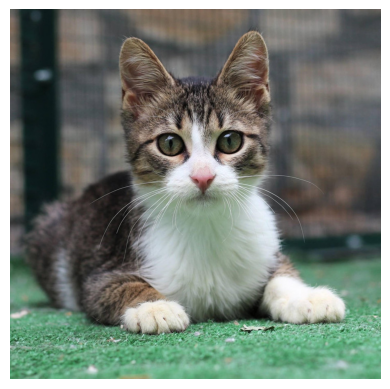

In [2]:
image_url = "https://media.4-paws.org/d/2/5/f/d25ff020556e4b5eae747c55576f3b50886c0b90/cut%20cat%20serhio%2002-1813x1811-720x719.jpg"

# Display the image
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

response = requests.get(image_url)
image = Image.open(BytesIO(response.content))
plt.imshow(image)
plt.axis("off");

Now, let’s classify the image using the zero-shot pipeline:

In [3]:
categories = ["animal", "vehicle"]

# Classify the image
outputs = image_classifier(image, candidate_labels=categories)
outputs = [{"score": round(output["score"], 4), "label": output["label"] } for output in outputs]
outputs

[{'score': 0.999, 'label': 'animal'}, {'score': 0.001, 'label': 'vehicle'}]

The model predicts the label "animal" with a higher confidence score than "vehicle". This is expected, as the image contains a cat.

---

### 3. Label granularity

Next, let’s experiment with different levels of label granularity. We'll try classifying the image into more specific sets of categories. For convenience, we'll also write a function that takes a URL and a list of labels, and displays the image along with the model's predictions.

[{'score': 0.848, 'label': 'animal'},
 {'score': 0.1512, 'label': 'appliance'},
 {'score': 0.0008, 'label': 'vehicle'}]

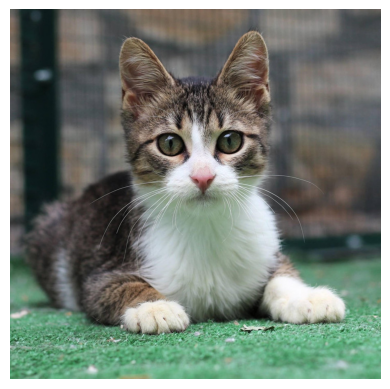

In [4]:
def classify_image(image_url, categories):
    # Display the image
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))
    plt.imshow(img)
    plt.axis("off")

    # Classify the image
    outputs = image_classifier(image_url, candidate_labels=categories)
    outputs = [{"score": round(output["score"], 4), "label": output["label"] } for output in outputs]
    return outputs

# Coarse-grained categories
coarse_labels = ["animal", "vehicle", "appliance"]
classify_image(image_url, coarse_labels)

[{'score': 0.9944, 'label': 'cat'},
 {'score': 0.0028, 'label': 'dog'},
 {'score': 0.0014, 'label': 'airplane'},
 {'score': 0.0014, 'label': 'car'}]

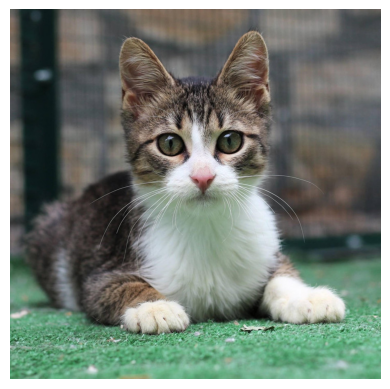

In [5]:
medium_labels = ["cat", "dog", "car", "airplane"]
classify_image(image_url, medium_labels)

[{'score': 0.9527, 'label': 'tabby cat'},
 {'score': 0.0469, 'label': 'Siamese cat'},
 {'score': 0.0003, 'label': 'sports car'},
 {'score': 0.0, 'label': 'golden retriever'}]

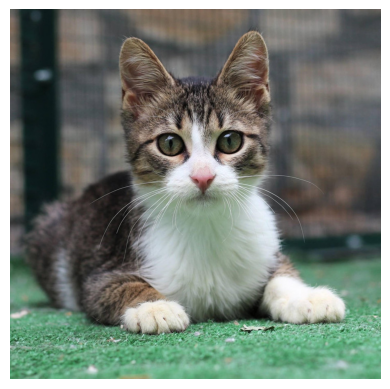

In [6]:
fine_labels = ["tabby cat", "Siamese cat", "golden retriever", "sports car"]
classify_image(image_url, fine_labels)

### 4. Choose Your Own Images and Labels

Zero-shot classification is highly useful in a range of industrial and consumer applications. You can use this technique to classify images in real-time without retraining models.

#### Your Task:
1. **Find or Capture Images**: Search for images online or capture photos of objects around you.
2. **Define Candidate Labels**: Create a list of candidate labels that describe the images.
3. **Classify the Images**: Use the zero-shot pipeline to classify the images based on your labels.

Consider how this technology could be applied in scenarios like:

- **Retail**: Automatically categorize products based on images.
- **Healthcare**: Identify medical conditions from diagnostic images.
- **Manufacturing**: Inspect products for defects on the assembly line.

Try expanding the task beyond describing objects. For example, you could classify images based on emotions, actions, or abstract concepts.

As a bonus, you can also try using Google's SigLIP model, a competitor to OpenAI's CLIP, by changing the model name in the pipeline initialization. To do so replace `model=openai/clip-vit-large-patch14` with `model=google/siglip-so400m-patch14-384` in the pipeline initialization code at the start of the notebook.

[{'score': 0.9718, 'label': 'ipod'},
 {'score': 0.0281, 'label': 'fruit'},
 {'score': 0.0001, 'label': 'music player'},
 {'score': 0.0, 'label': 'gadget'}]

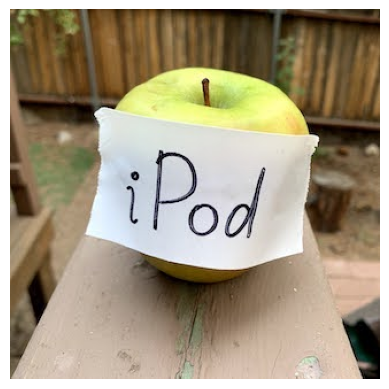

In [9]:
# Example: Classifying a custom image
custom_image_url = "https://cdn.openai.com/multimodal-neurons/assets/apple/apple-ipod.jpg"
custom_labels = ["fruit", "gadget", "music player", "ipod"]

classify_image(custom_image_url, custom_labels)

### How Zero-Shot Learning Models Are Trained

Zero-shot learning models are designed to handle tasks they weren’t specifically trained for by using general patterns learned from large datasets. Here’s how they are trained and why they work:

#### 1. **Pre-training on Large Datasets**
Zero-shot models are trained on huge datasets containing pairs of:
- **Images**: Photos, illustrations, or other visual content.
- **Text Descriptions**: Sentences, captions, or labels describing what’s in the image.

For example, an image of a dog might be paired with the text “a golden retriever running in a park.” By seeing millions of these pairs, the model learns how visual features (like shapes and colors) relate to text descriptions.

#### 2. **Building a Shared Embedding Space**
The model has two main parts:
- **Image Encoder**: Converts images into numerical representations (vectors) that summarize their features.
- **Text Encoder**: Converts text into similar numerical representations.

Both encoders learn to map images and text into a common "embedding space," where:
- Similar images and text descriptions are placed close together.
- Unrelated images and text are placed far apart.

#### 3. **Generalized Learning**
Instead of being trained for specific tasks (like "dog vs. cat classification"), the model learns general features about:
- How images and text relate to each other.
- Concepts that appear across many tasks (e.g., animals, vehicles, actions).

Because of this generalization, the model can handle new tasks it wasn’t explicitly trained on, as long as you provide it with meaningful candidate labels.

#### 4. **How It Works at Inference Time**
When you give the model a new image and candidate labels (e.g., "dog," "cat," "car"):
1. The **image encoder** processes the image and creates a vector representing its features.
2. The **text encoder** processes each candidate label and converts it into a vector.
3. The model compares the image vector to each label vector, measuring how "close" they are in the embedding space.
4. Labels with higher similarity scores are more likely to match the image.

#### Why Zero-Shot Learning is Useful
- **No Task-Specific Training**: You don’t need to train the model on every task you want to solve.
- **Flexible**: You can easily change the categories (labels) to fit a new task.
- **Scalable**: It works for tasks where labeled data is hard to get or doesn’t exist.

#### Example Applications
- **Content Tagging**: Automatically categorize photos or videos into broad or specific labels.
- **Accessibility**: Provide descriptions for images to assist visually impaired users.
- **Real-Time Analysis**: Quickly classify images in dynamic environments (e.g., traffic cameras).

By leveraging patterns learned from diverse data, zero-shot models can handle tasks with minimal setup, making them incredibly versatile for real-world use cases.